In [1]:
import pandas as pd

In [3]:
mydata=pd.read_csv("Bmi_male_female.csv")
mydata

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [6]:
mydata["Gender"].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [7]:
mydata["Index"]=mydata.Index.map({0:"Extremely Weak",1:"Week",2:"Normal",3:"Overweight",4:"Obesity",5:"Extreme Obesity"})
mydata

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [8]:
import seaborn as sb
from matplotlib import pyplot as plt

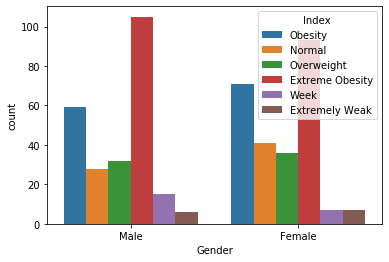

In [9]:
sb.countplot("Gender",data=mydata,hue="Index")
plt.show()

In [10]:
mydata.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [11]:
 mydata.dtypes                                                               

Gender    object
Height     int64
Weight     int64
Index     object
dtype: object

In [12]:
# Step 1 separate input(feature,g,h,w) and output (target:index)

In [13]:
X_GHW=mydata.iloc[:,0:3]
Y_index=mydata.iloc[:,3]

In [14]:
print("Shape of X_GHW is {} and Shape of Y_index {}".format(X_GHW.shape,Y_index.shape))

Shape of X_GHW is (500, 3) and Shape of Y_index (500,)


In [15]:
#Encode male ..0 and female ....1

In [16]:
#1.Encoding
X_GHW['Gender']=X_GHW.Gender.map({"Male":0,"Female":1})
X_GHW

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


In [17]:
X_GHW.ndim

2

In [18]:
X_ARRAY=X_GHW.values
Y_ARRAY=Y_index.values

In [19]:
X_ARRAY

array([[  0, 174,  96],
       [  0, 189,  87],
       [  1, 185, 110],
       ...,
       [  1, 141, 136],
       [  0, 150,  95],
       [  0, 173, 131]], dtype=int64)

In [20]:
Y_ARRAY

array(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Normal', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Overweight', 'Overweight', 'Week', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Week', 'Week',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Obesity', 'Extreme Obesity', 'Normal', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Normal', 'Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Extreme Obesity', 'Week', 'Extreme Obesity', 'Obesity', 'Obesity',
       'Overweight', 'Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Extremely Weak', 'Extreme Obesity',
 

In [21]:
print("Type of X_array is {} and Y_array is {}".format(type(X_ARRAY),type(Y_ARRAY)))

Type of X_array is <class 'numpy.ndarray'> and Y_array is <class 'numpy.ndarray'>


In [22]:
#Split the data into training and testing part [70:30]

In [24]:
n=int(len(X_ARRAY)*.70)
n

350

In [30]:
X_train=X_ARRAY[:n]
X_test=X_ARRAY[n:]
Y_train=Y_ARRAY[:n]
Y_test=Y_ARRAY[n:]

In [25]:
#KNN Classification model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
k=6

In [27]:
trainer=KNeighborsClassifier(n_neighbors=k,metric="euclidean")

In [28]:
#trainer

In [31]:
learner=trainer.fit(X_train,Y_train)

In [33]:
learner.predict([[1,188,50]])

array(['Extremely Weak'], dtype=object)

In [34]:
#Testing [test sample]

In [35]:
Xa=X_test
Ya=Y_test

In [36]:
Yp=learner.predict(Xa)

In [37]:
#len(Yp)

In [38]:
Yplist=list(Yp)
Yalist=list(Ya)

In [39]:
table_Ya_Yp=pd.DataFrame({"Ya":Yalist,"Yp":Yplist})

In [40]:
table_Ya_Yp

,Ya,Yp
0,Normal,Overweight
1,Normal,Normal
2,Normal,Normal
3,Extreme Obesity,Extreme Obesity
4,Extremely Weak,Extremely Weak
...,...,...
145,Extreme Obesity,Extreme Obesity
146,Obesity,Obesity
147,Extreme Obesity,Extreme Obesity
148,Extreme Obesity,Extreme Obesity


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
acc_score=accuracy_score(Ya,Yp)*100
print("knn model having  accuracy_score= {} at k={}".format(acc_score,k))

knn model having  accuracy_score= 91.33333333333333 at k=6


In [43]:
#value of k

In [69]:
import numpy as np
k=round(np.sqrt(len(X_ARRAY)))
K=int(k)
K

22

In [70]:
n=list(range(1,K))
n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [71]:
acc_list=[]
for i in n:
    #print(i)
    trainer_knn=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    learner_knn=trainer_knn.fit(X_ARRAY,Y_ARRAY)
    Yp_knn=learner_knn.predict(Xa)
    acc_knn=accuracy_score(Yp_knn,Ya)*100
    #print("Acc_score of knn is {} at K={}".format(acc_knn,i))
    acc_list.append(acc_knn)
acc_list_array=np.array(acc_list)
print("The max acc of knn model is {} and value of k is {} ".format(acc_list_array.max(),acc_list_array.argmax()))

The max acc of knn model is 100.0 and value of k is 0 


In [72]:
acc_list_array.max()

100.0

In [74]:
acc_list_array=np.array(acc_list)
acc_df=pd.DataFrame({"Acc":acc_list,"Value_K":n})

In [75]:
acc_df

,Acc,Value_K
0,100.000000,1
1,94.666667,2
2,95.333333,3
3,96.000000,4
4,95.333333,5
5,94.000000,6
6,93.333333,7
7,95.333333,8
8,95.333333,9
9,96.000000,10


In [76]:
acc_list_array.argmax()

0

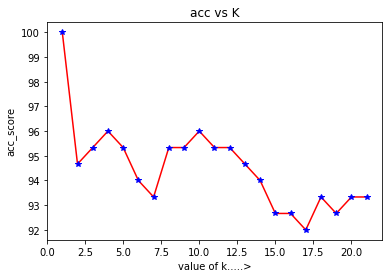

In [77]:
plt.plot(n,acc_list,'r')
plt.plot(n,acc_list,'b*')
plt.xlabel("value of k.....>")
plt.ylabel("acc_score")
plt.title("acc vs K")
plt.show()